In [3]:
import numpy
import sympy
import ipywidgets
from matplotlib import pyplot
%matplotlib inline

In [5]:
sympy.init_printing()

In [8]:
u_max = sympy.symbols('u_max')
u_star = sympy.symbols('u_star')
rho_max = sympy.symbols('rho_max')
rho_star = sympy.symbols('rho_star')
A, B = sympy.symbols('A B')

In [9]:
A

In [10]:
u_max

In [39]:
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

In [40]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs ,eq2.rhs - 3*eq3.rhs)

In [41]:
eq4

In [42]:
eq4.simplify()

In [62]:
rho_star_sol = sympy.solve(eq4,rho_star)[0]

In [63]:
rho_star_sol

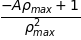

In [64]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

In [65]:
quadA = eq2.subs([(rho_star, rho_star_sol), (B, B_sol)])

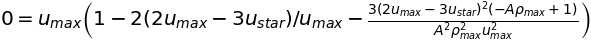

In [66]:
quadA

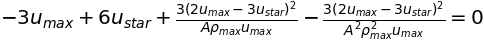

In [67]:
quadA.simplify()

In [59]:
eq2

In [68]:
A_sol = sympy.solve(quadA, A)

In [75]:
A_val_0 = A_sol[0].evalf(subs={rho_max:10.0, u_max:1.0,u_star:0.7})

In [72]:
A_sol_0

In [76]:
A_val_1 = A_sol[1].evalf(subs={rho_max:10.0, u_max:1.0,u_star:0.7})

In [81]:
A_val = max(A_val_0, A_val_1)
B_val = B_sol.evalf(subs={rho_max:10.0, A:A_val})

In [88]:
A

In [83]:
def cubic_flux(rho, u_max,A,B):
    F = rho * u_max * (1-A*rho-B*rho**2)
    return F

In [84]:
rho_max =10.0
u_max= 1.0

L=4.0
nx=81
dx = L/(nx-1)
x = numpy.linspace(0.0,L,num=nx)

In [92]:
rho0 = numpy.zeros_like(x)
mask = x < 2.0
rho0[mask]=rho_max *x[mask]/2

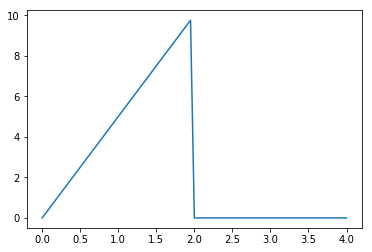

In [87]:
pyplot.plot(x,rho0)

In [101]:
def FTBS(rho0,nt,dt,dx,rho_0,*args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = cubic_flux(rho,*args)
        rho[1:]=rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = rho_0
        rho_hist.append(rho.copy())
    return rho_hist

In [108]:
sigma =0.5
nt=30
dt = sigma *dx / u_max
rho_hist = FTBS(rho0,nt,dt,dx,rho0[0],u_max,A_val,B_val)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [109]:
def plot(n,x,rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('time step'.format(n))
    pyplot.xlabel('road')
    pyplot.ylabel('rho')
    pyplot.plot(x,rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(0.0,11.0)
    pyplot.show

In [110]:
def interactive_plot(x,rho_hist):
    nt = len(rho_hist)-1
    nt_slider = ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')
    w = ipywidgets.interactive(plot,n=nt_slider,x=ipywidgets.fixed(x),rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [111]:
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…

In [115]:
def lax_f(rho0,nt,dt,dx,u_max,rho_max):
    #计算在任意step的结果
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    nx = len(rho0)
    for n in range(nt):
        rhon = rho.copy()
        F = cubic_flux(rhon,*args)
        for i in range(1,(nx-1)):
            rho[i] = (0.5*(rhon[i-1]+rhon[i+1])-dt*(F[i+1]-F[i-1])/(2*dx))
        rho_hist.append(rho.copy())
    return rho_hist
def interactive_plot(x,rho_hist):
    nt = len(rho_hist)-1
    nt_slider = ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')
    w = ipywidgets.interactive(plot,n=nt_slider,x=ipywidgets.fixed(x),rho_hist=ipywidgets.fixed(rho_hist))
    return w
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…